# Figure used for Illustrating Simulated Data

In [4]:
# import relevant packages 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy.stats import beta, norm, lognorm
from scipy.ndimage import gaussian_filter1d
from scipy.signal import welch
import os 

from src.data.create_simulated_data import SimulateData
from src.data.dataset_utils import read_ns5_file
sns.set_theme()


**SA**

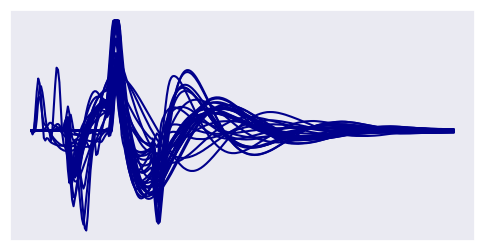

In [3]:
SA_options = np.load("../data/noise_files_sim_data/SA_time.npy")
plt.figure(figsize=(6, 3))
plt.plot(SA_options.T, color ="darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_SA.pdf")
plt.show()

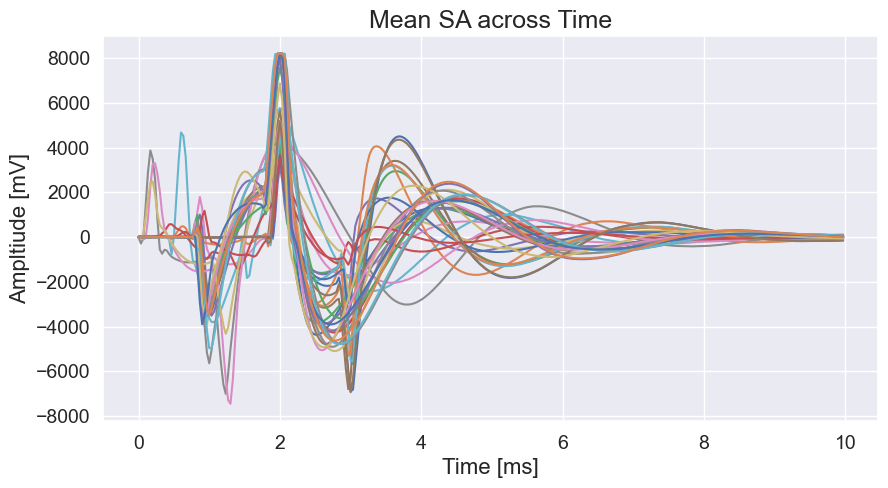

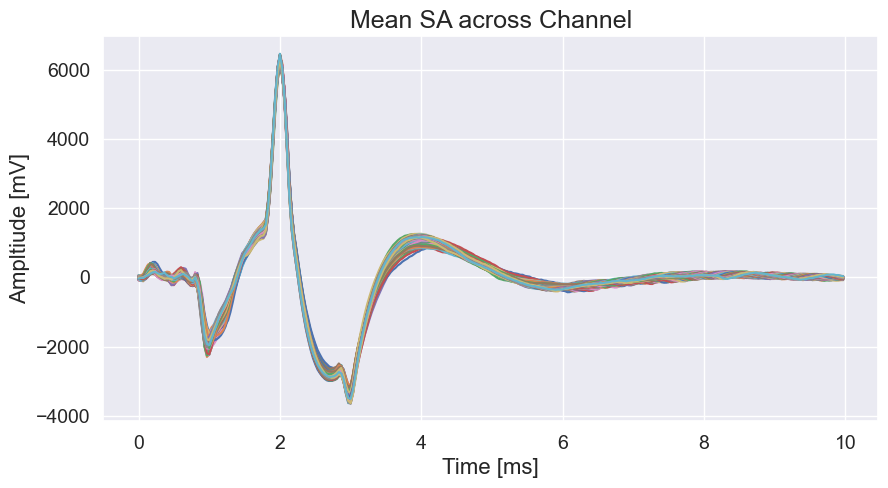

In [23]:
SA_options1 = np.load("../data/noise_files_sim_data/SA_time.npy")
SA_options2 = np.load("../data/noise_files_sim_data/SA_channel.npy")
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

x_axis = np.arange(0, 300) / 30 
plt.figure(figsize=(10, 5))
plt.plot(x_axis, SA_options1.T)
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.ylabel("Ampltiude [mV]", fontdict={"fontsize": 16})
plt.title("Mean SA across Time", fontdict={"fontsize": 18})
plt.savefig("../../../figures/stim_data_SA_time.pdf")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x_axis, SA_options2.T)
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.ylabel("Ampltiude [mV]", fontdict={"fontsize": 16})
plt.title("Mean SA across Channel", fontdict={"fontsize": 18})
plt.savefig("../../../figures/stim_data_SA_channel.pdf")
plt.show()

**CAP**

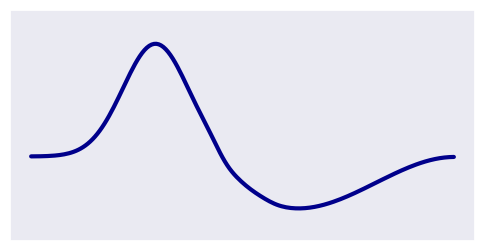

In [28]:
y1 = norm.pdf(np.linspace(-2, 1, 80), 0, 0.5)# beta.pdf(np.linspace(0, 1, 100), 2, 3)
y2 = beta.pdf(np.linspace(0, 1, 100), 2, 3)
Y = np.r_[4*y1, -0.8*y2]
Y[len(Y)//2-10:len(Y) // 2 + 10] = gaussian_filter1d(Y[len(Y)//2-10:len(Y) // 2 + 10], 4)
Y = gaussian_filter1d(Y, 4)
Y /= np.max(Y)
# Y *= 30 

x_axis = np.arange(0, len(Y)) / 30
plt.figure(figsize = (6, 3))
plt.plot(x_axis, Y, linewidth = 3, color = "darkblue")
plt.ylim([-0.75, 1.3])
plt.yticks([])
plt.xticks([])
plt.savefig("../../../figures/stim_data_CAP1.pdf")
plt.show()

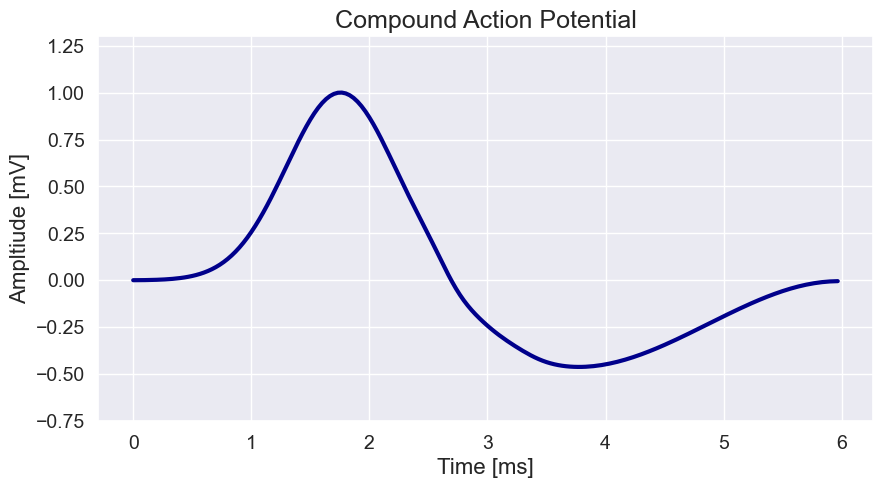

In [29]:
y1 = norm.pdf(np.linspace(-2, 1, 80), 0, 0.5)# beta.pdf(np.linspace(0, 1, 100), 2, 3)
y2 = beta.pdf(np.linspace(0, 1, 100), 2, 3)
Y = np.r_[4*y1, -0.8*y2]
Y[len(Y)//2-10:len(Y) // 2 + 10] = gaussian_filter1d(Y[len(Y)//2-10:len(Y) // 2 + 10], 4)
Y = gaussian_filter1d(Y, 4)
Y /= np.max(Y)
# Y *= 30 

x_axis = np.arange(0, len(Y)) / 30
plt.figure(figsize = (10, 5))
plt.plot(x_axis, Y, linewidth = 3, color = "darkblue")
plt.ylim([-0.75, 1.3])
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.ylabel("Ampltiude [mV]", fontdict={"fontsize": 16})
plt.title("Compound Action Potential", fontdict={"fontsize": 18})
plt.savefig("../../../figures/stim_data_CAP_report.pdf")
plt.show()

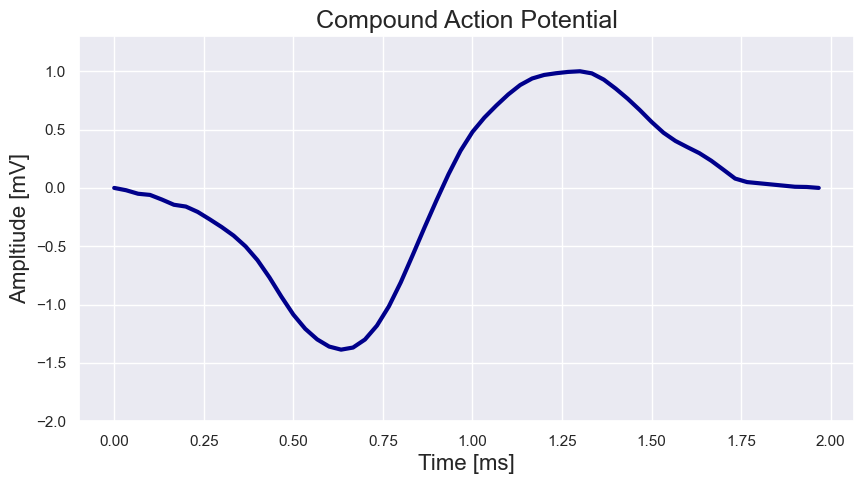

In [51]:
Y = np.load("../data/noise_files_sim_data/CAP2.npy")

x_axis = np.arange(0, len(Y)) / 30
plt.figure(figsize = (10, 5))
plt.plot(x_axis, Y, linewidth = 3, color = "darkblue")
plt.ylim([-2, 1.3])
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.ylabel("Ampltiude [mV]", fontdict={"fontsize": 16})
plt.title("Compound Action Potential", fontdict={"fontsize": 18})
plt.savefig("../../../figures/stim_data_CAP2_report.pdf")
plt.show()

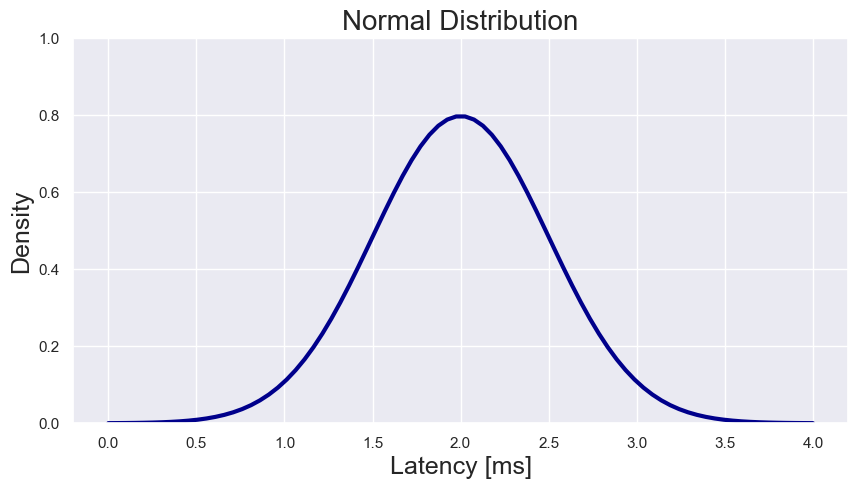

In [88]:
# draw from normal distribution
normal = norm.pdf(np.linspace(-2, 2, 80), 0, 0.5)

x_axis = np.arange(0, len(Y)) / 30
plt.figure(figsize = (10, 5))
plt.plot(np.linspace(0, 4, 80), normal, linewidth = 3, color = "darkblue")
plt.ylim([0, 1])
plt.xlabel("Latency [ms]", fontdict={"fontsize": 18})
plt.ylabel("Density", fontdict={"fontsize": 18})
plt.title("Normal Distribution", fontdict={"fontsize": 20})
plt.savefig("../../../figures/normal_dist.pdf")
plt.show()

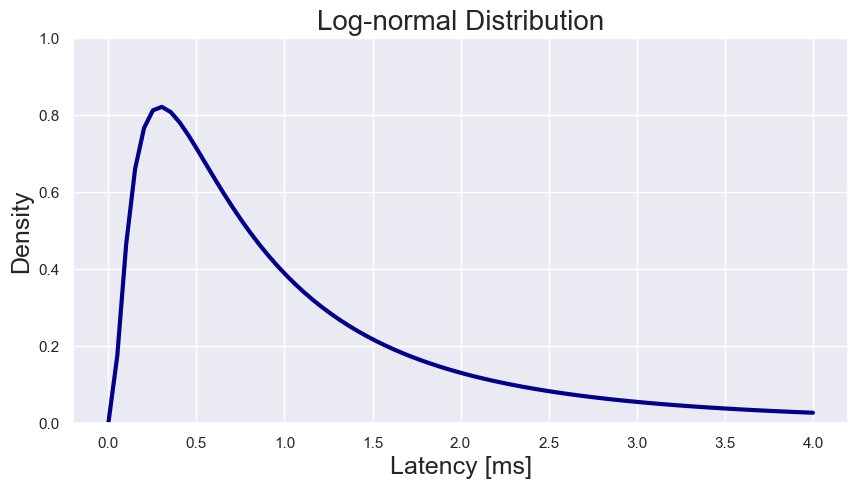

In [87]:
# draw from normal distribution
log_normal = lognorm.pdf(np.linspace(0, 4, 80), 1, scale = 0.8)

x_axis = np.arange(0, len(Y)) / 30
plt.figure(figsize = (10, 5))
plt.plot(np.linspace(0, 4, 80), log_normal, linewidth = 3, color = "darkblue")
plt.ylim([0, 1])
plt.xlabel("Latency [ms]", fontdict={"fontsize": 18})
plt.ylabel("Density", fontdict={"fontsize": 18})
plt.title("Log-normal Distribution", fontdict={"fontsize": 20})
plt.savefig("../../../figures/log_normal_dist.pdf")
plt.show()

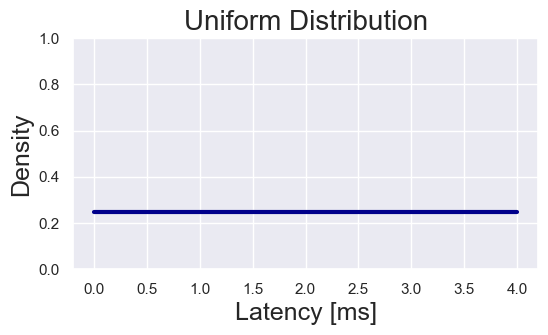

In [90]:
# draw from normal distribution
uniform = np.ones(5) / 4 

x_axis = np.arange(0, len(Y)) / 30
plt.figure(figsize = (6, 3))
plt.plot([0, 1, 2, 3, 4], uniform, linewidth = 3, color = "darkblue")
plt.ylim([0, 1])
plt.xlabel("Latency [ms]", fontdict={"fontsize": 18})
plt.ylabel("Density", fontdict={"fontsize": 18})
plt.title("Uniform Distribution", fontdict={"fontsize": 20})
plt.savefig("../../../figures/uniform.pdf")
plt.show()

**Noise**

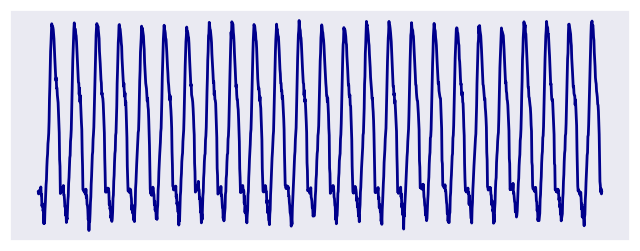

In [12]:
noise_500 = np.load("../data/noise_files_sim_data/500_Hz.npy")
plt.figure(figsize = (8, 3))
plt.plot(noise_500[:1500], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_noise1.pdf")
plt.show()

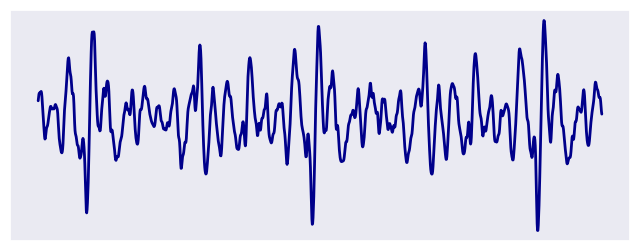

In [ ]:
# PLI
pli_signal = np.load("../data/noise_files_sim_data/PLI.npy")

plt.figure(figsize = (8, 3))
plt.plot(pli_signal[:1500], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
# plt.savefig("../../../figures/stim_data_noise2.pdf")
plt.show()

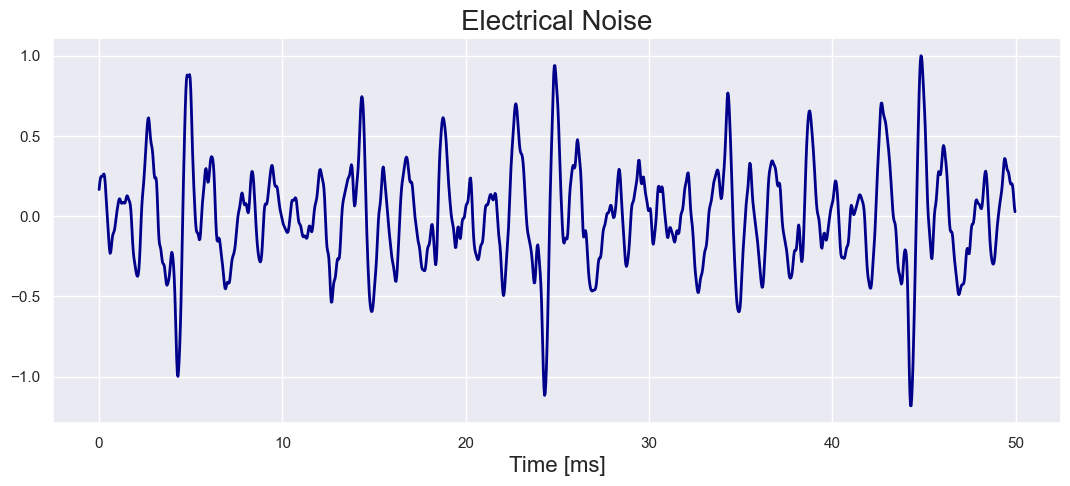

In [60]:
# PLI
pli_signal = np.load("../data/noise_files_sim_data/PLI.npy")
x_axis = np.arange(0, len(pli_signal)) / 30

plt.figure(figsize = (13, 5))
plt.plot(x_axis[:1500], pli_signal[:1500], linewidth = 2, color = "darkblue")
plt.xlabel("Time [ms]", fontdict={"fontsize": 16})
plt.title("Electrical Noise", fontdict={"fontsize": 20})
plt.savefig("../../../figures/pli_noise_report.pdf")
plt.show()

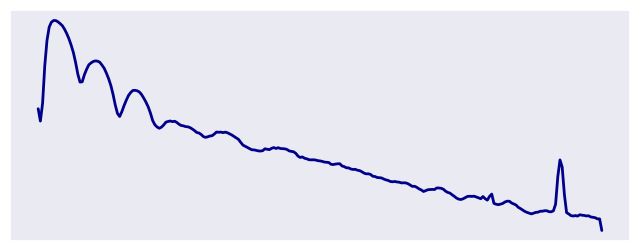

In [ ]:
# high frequency noise
times, data = read_ns5_file("../../data/raw/Ramp data/Eye 3/ramp_file6.ns5")

p, fxx = welch(np.mean(data, axis = 1), fs = 30000, nperseg = 512)

plt.figure(figsize = (8, 3))
plt.plot(p, 20 * np.log(fxx), linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_noise3.pdf")
plt.show()


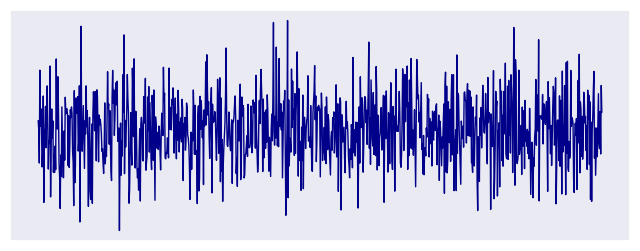

In [8]:
# white noise 
white_noise = np.random.normal(0, 1, 1000)
plt.figure(figsize = (8, 3))
plt.plot(white_noise, color = "darkblue", linewidth = 1)
plt.xticks([])
plt.yticks([])
# plt.savefig("../../../figures/stim_data_noise4.pdf")
plt.show()

**Signal**

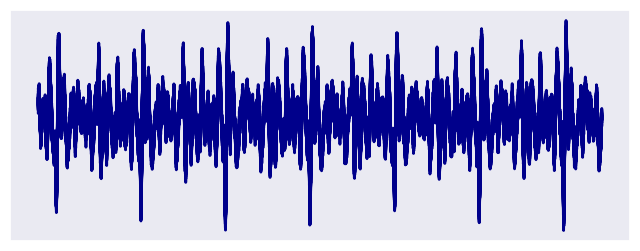

In [44]:
# Only with stimulation artifacts 
os.chdir("../data")
simulator = SimulateData(noise_params = [200, 1, 10, 0.3], SNR = 0, stim_freq=10, stim_amp = 0, CAP_freq = 40, CAP_dist="lognormal")
simulator.construct_signal()

plt.figure(figsize = (8, 3))
plt.plot(simulator.signal[:4000], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
# plt.savefig("../../../figures/stim_data_signal1.pdf")
plt.show()

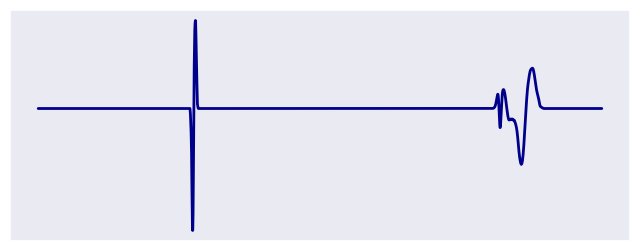

In [17]:
# stimulation artifacts and cap 
simulator = SimulateData(noise_params = [200, 1, 10, 0.3], SNR = 1, stim_freq=10, stim_amp = 0, CAP_freq = 40, CAP_dist="lognormal")
simulator.construct_signal()
true_signal = simulator.true_signal

plt.figure(figsize = (8, 3))
plt.plot(true_signal[:4000, 0], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_signal2.pdf")
plt.show()

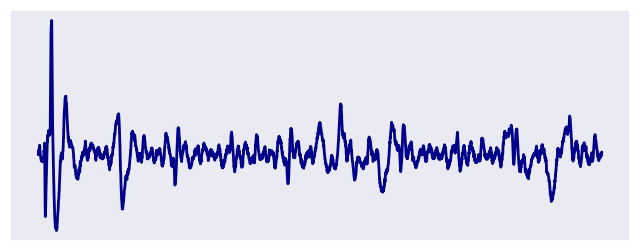

In [42]:
# whole signal 
simulator = SimulateData(noise_params = [200, 1, 10, 0.3], SNR = 15, stim_freq=10, stim_amp = 1000, CAP_freq = 80, CAP_dist="uniform")
simulator.construct_signal()


plt.figure(figsize = (8, 3))
plt.plot(simulator.signal[3000:6000, 0], linewidth = 2, color = "darkblue")
plt.xticks([])
plt.yticks([])
plt.savefig("../../../figures/stim_data_signal3.pdf")
plt.show()